In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#  Problem Statement

The problem is to stop the fraud of using fake currency notes. For this problem,
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [2]:
bank_data=pd.read_csv("BankNote.csv")

In [3]:
bank_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#  Data Analysis 

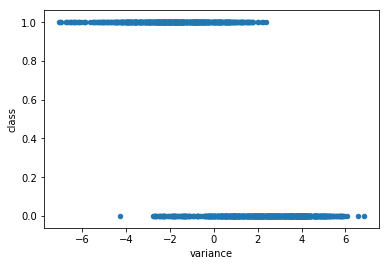

In [4]:
bank_data.plot.scatter(x='variance',y='class')

We see a lot of overlap between the values. 
Variance values from roughly -7 to +3 corresponds to class- A ( Real currency note) and 
variance values from -2.5 to +7 correspond to class 0 ( A fake currency note) with one outlier at -4

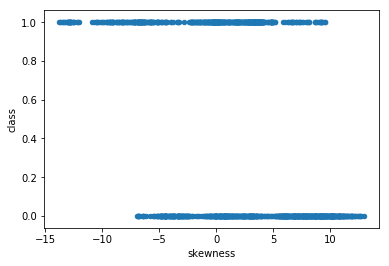

In [5]:
bank_data.plot.scatter(x='skewness',y='class')

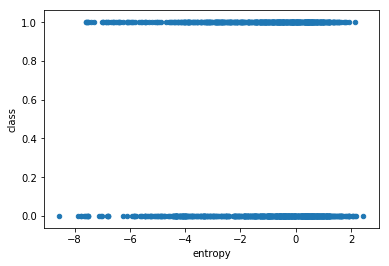

In [6]:
bank_data.plot.scatter(x='entropy',y='class')

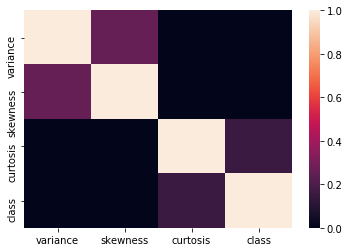

In [49]:
T = (bank_data.loc[:, ['variance','skewness','curtosis','class']]).corr()
sns.heatmap(T, vmin=0,vmax=1)

No feature engineering or preprocessing is needed since he data does not have any missing values and it comes with all the features already extracted

# Predictive Modelling - Using Random Forests

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X=bank_data.loc[:,['variance','skewness','curtosis']].values
y=bank_data['class'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

In [54]:
clf = RandomForestClassifier(n_estimators=150, max_depth=2, random_state=0)

# Grid Search

In [55]:
parameter_grid = {'n_estimators': [100, 200, 300, 400, 500,700,800,1000,1500],
                 'max_features': [1, 2, 3, 4,5,6,7,8],
                'random_state':  [0,15,20,35,50,80,100,150,180,200],
                 'max_depth':   [2,3,4,5,6]
                 
                 }

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X, y)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

In [56]:
clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
y_pred=clf.predict(X_test)

In [58]:
target_names = ['Fake Currency', 'Real Currency']
report=classification_report(y_test,y_pred,target_names=target_names)

In [59]:
print(report)

               precision    recall  f1-score   support

Fake Currency       0.93      0.98      0.95       168
Real Currency       0.97      0.88      0.92       107

  avg / total       0.94      0.94      0.94       275



#  Feature Importances

In [60]:
print(clf.feature_importances_)

[0.43979042 0.35703911 0.20317047]


The features are variance, skewness and kurtosis respectively

#  Contingency matrix

In [61]:
from sklearn.metrics import confusion_matrix

In [68]:
cm=confusion_matrix(y_test,y_pred)

In [69]:
 tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [70]:
(tn, fp, fn, tp)

(165, 3, 13, 94)

In [71]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

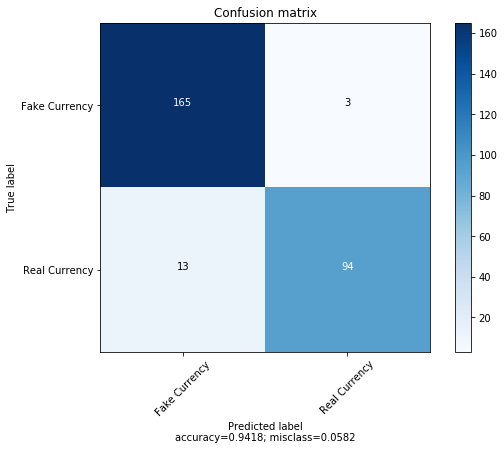

In [73]:
plot_confusion_matrix(cm,normalize=False,target_names=['Fake Currency','Real Currency'])